In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [4]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)


C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
df_pca_clustered = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_clustered['Cluster'] = kmeans.labels_

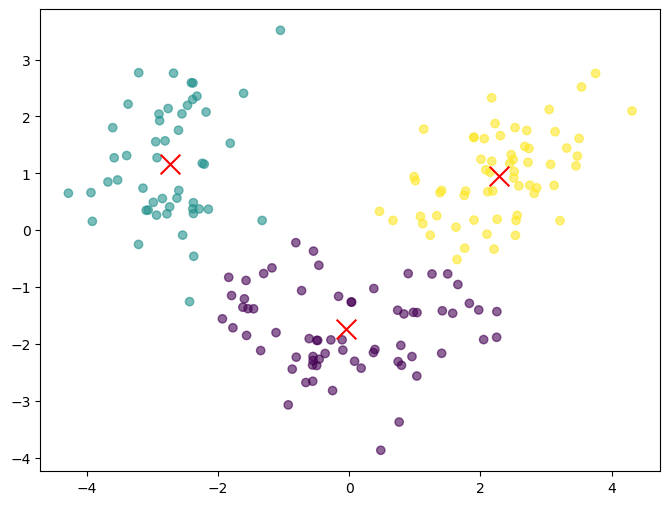

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_clustered['PCA1'], df_pca_clustered['PCA2'], c=df_pca_clustered['Cluster'], cmap='viridis', alpha=0.6)

# Plot the centroids of the clusters (in the 2D PCA space)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
